In [1]:
#importing pandas
import pandas as pd
#read in the housing data
df = pd.read_csv('house_selling_prices.csv')
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [2]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm

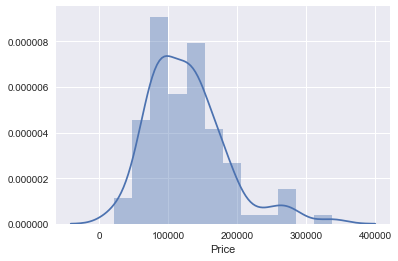

In [15]:
#Plot the distribution for Price
sns.distplot(df["Price"])

In [16]:
#Calculate the Kolmogorov–Smirnov statistic to test for normality
df_price = df["Price"]
stats.kstest(df_price, 'norm', norm.fit(df["Price"]))

KstestResult(statistic=0.092013927930138628, pvalue=0.34610331296867636)

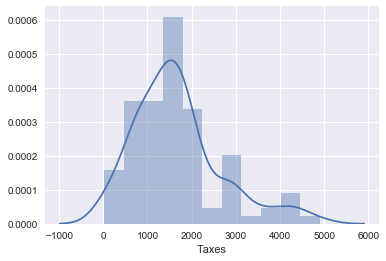

In [17]:
#Plot the distribtion for Taxes
sns.distplot(df["Taxes"])

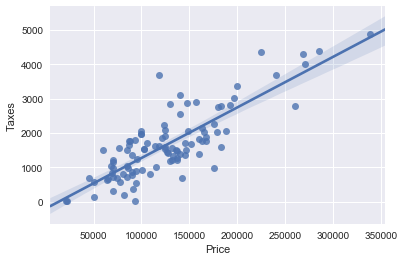

In [18]:
#Plot the Regression for Taxes vs Prices
sns.regplot(x=df["Price"], y=df["Taxes"])

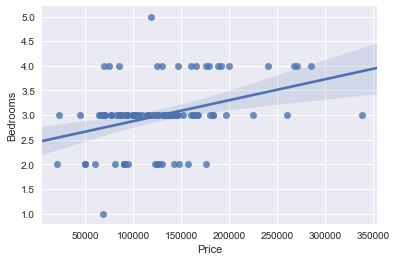

In [19]:
#Plot the regression for Prices vs Bedrooms
sns.regplot(x=df["Price"], y=df["Bedrooms"])

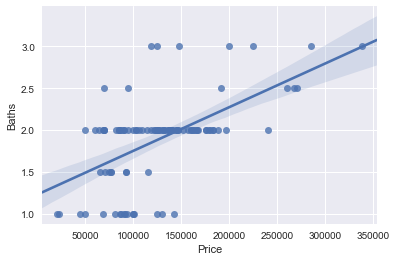

In [20]:
#Plot the regression for Price vs Baths
sns.regplot(x=df["Price"], y=df["Baths"])

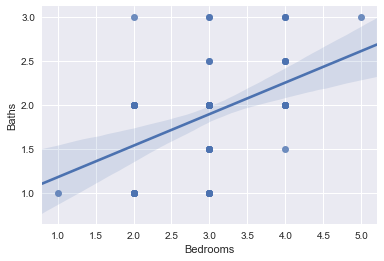

In [21]:
#Plot the regression for Bedrooms vs Baths
sns.regplot(x=df["Bedrooms"], y=df["Baths"])

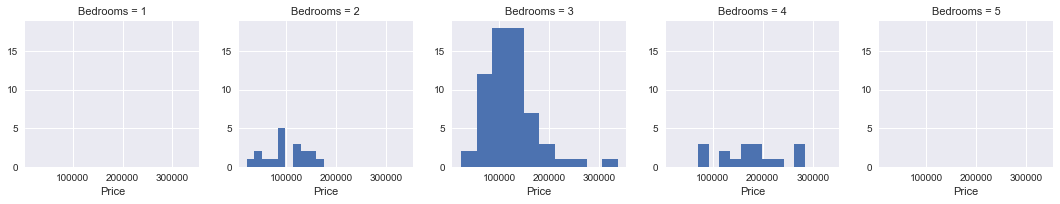

In [22]:
import matplotlib.pyplot as plt

#Plot small multiples for Price with Number of Bedrooms 
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Price")

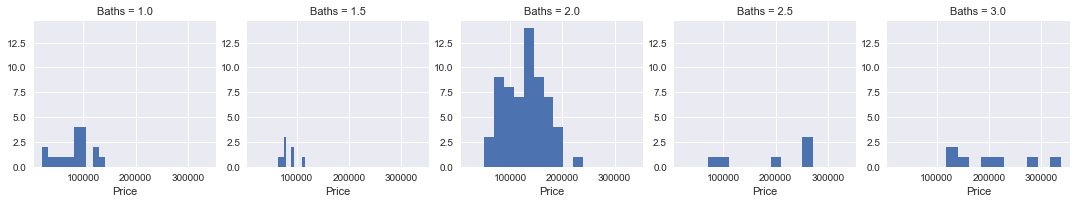

In [23]:
import matplotlib.pyplot as plt

#Plot the small multiples for Price vs Number of Baths
multiples = sns.FacetGrid(df, col = "Baths")
multiples = multiples.map(plt.hist, "Price")

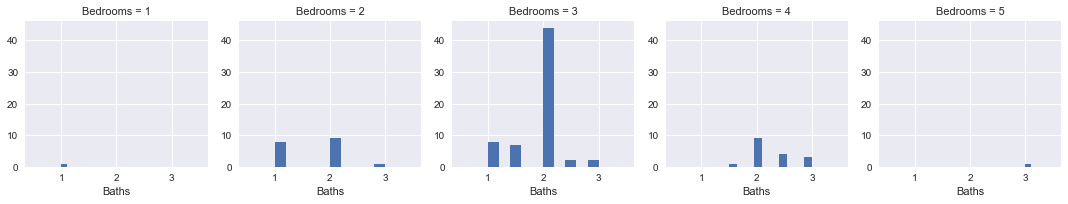

In [24]:
import matplotlib.pyplot as plt

#Plot the small multiples for Baths vs Bedrooms
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Baths")

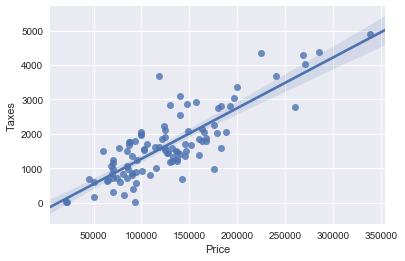

In [25]:
sns.regplot(x='Price', y='Taxes', data=df)

In [5]:
df["Price"].describe()

count       100.000000
mean     126698.000000
std       56356.774718
min       21000.000000
25%       86875.000000
50%      123750.000000
75%      153075.000000
max      338000.000000
Name: Price, dtype: float64

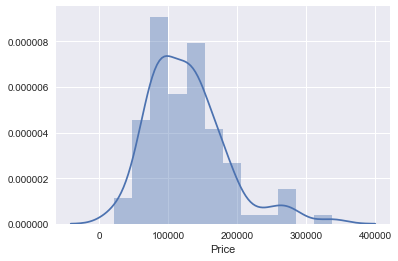

In [6]:
sns.distplot(df["Price"])

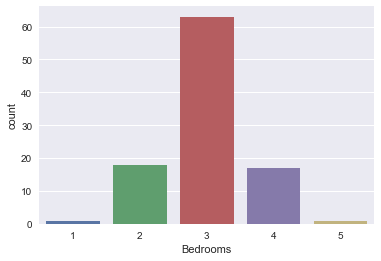

In [9]:
bedroom_count = df["Bedrooms"].value_counts()
sns.countplot(df["Bedrooms"])

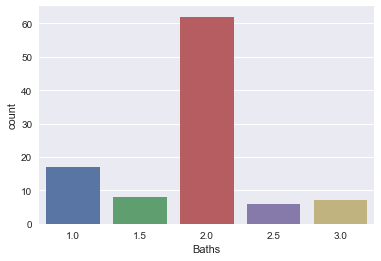

In [12]:
sns.countplot(df["Baths"])

In [13]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [3]:
import statsmodels.api as sm

X = df["Price"]
Y = df["Taxes"]

model = sm.OLS(Y,X).fit()
print(model.summary())

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1036.
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           3.07e-54
Time:                        15:06:56   Log-Likelihood:                -777.35
No. Observations:                 100   AIC:                             1557.
Df Residuals:                      99   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0134      0.000     32.184      0.0

In [14]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [17]:
import statsmodels.api as sm

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           1.39e-65
Time:                        15:54:18   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2